<a href="https://colab.research.google.com/github/ismailasy/Deep_IOT_Network_Anomaly_Detection/blob/main/Memoire_Classification_binaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
pip install  bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Nouvelle section

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from bayes_opt import BayesianOptimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D,LSTM, MaxPooling2D,UpSampling2D,Conv2DTranspose, Dropout, Flatten, Activation, LeakyReLU, ReLU, Input,concatenate,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE




In [43]:
import pandas as pd
import numpy as np
  
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Selected dataset for ML and DL/UNSW_NB15_training.csv', low_memory=False)
df_test =  pd.read_csv('/content/drive/MyDrive/Datasets/Selected dataset for ML and DL/UNSW_NB15_testing.csv', low_memory=False)

In [44]:
data = pd.concat([df_train,df_test],axis=0)

In [45]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [47]:
print(data['attack_cat'].value_counts())

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64


In [48]:
#supprimer les colonnes inutiles
df_train.drop('id', axis=1, inplace=True)
df_train.drop('attack_cat', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)
df_test.drop('attack_cat', axis=1, inplace=True)

In [49]:
#Nous concaténons l'ensemble d'apprentissage et l'ensemble de test pour manipuler directement l'ensemble.
df = pd.concat([df_train,df_test],axis=0)

In [50]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


In [51]:
df.shape

(257673, 43)

In [52]:
df_class_Normal = df[df['label'] == 0]
df_class_Attack = df[df['label'] == 1]


In [53]:
#Sous-échantillonnage de la catégorie d'attaque jusqu'à atteindre la même valeur que la catégorie Normal
df_class_Attack = df_class_Attack.sample(df_class_Normal.shape[0])
#Concaténé
df = pd.concat([df_class_Normal,df_class_Attack], axis=0)

In [54]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


Forme de dataFrame: (186000, 43) 

Nombre d'échantillons d'attaque


0    93000
1    93000
Name: label, dtype: int64


Tracer l'équilibre de dataFrame


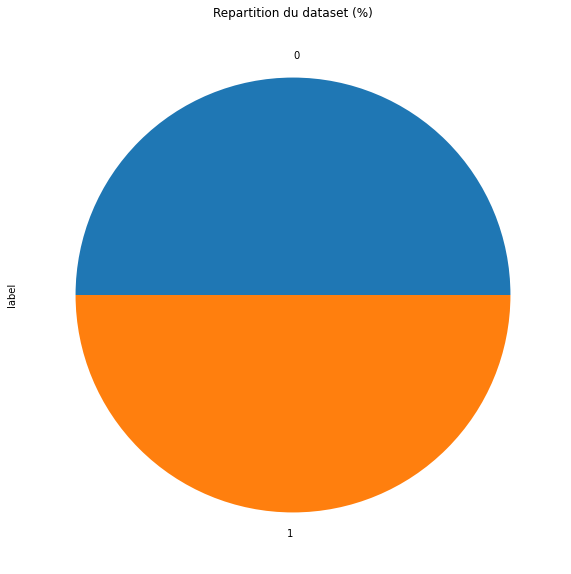

In [55]:
#Visualisation dans un graphique circulaire du poids de chaque classe
print("Forme de dataFrame: {} \n".format(df.shape))
print("Nombre d'échantillons d'attaque")
display(df['label'].value_counts())
print("")
print("Tracer l'équilibre de dataFrame")
df_plot = (df['label'].value_counts(normalize=True) *100)
df_plot.plot(kind='pie',figsize=(10,10),title='Repartition du dataset (%)')

In [56]:
#Conversion de la chaîne de type de données en nombres entiers dans une plage comprise entre 0 et 255 (1 octet d'informations)
def encode_string_byte (df,name):
  df[name] = LabelEncoder().fit_transform(df[name])

encode_string_byte (df,'proto')
encode_string_byte (df,'state') 
encode_string_byte (df,'service') 

In [57]:
#Normalisation des nombres entiers en valeurs décimales comprises entre 0 et 1
def numerical_minmax_normalization (df, name):
  x = df[name].values.reshape(-1,1)
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df[name] = x_scaled

numerical_minmax_normalization(df,'dur')
numerical_minmax_normalization(df,'spkts')
numerical_minmax_normalization(df,'dpkts')
numerical_minmax_normalization(df,'sbytes')
numerical_minmax_normalization(df,'dbytes')
numerical_minmax_normalization(df,'rate')
numerical_minmax_normalization(df,'sttl')
numerical_minmax_normalization(df,'dttl')
numerical_minmax_normalization(df,'sload')
numerical_minmax_normalization(df,'dload')
numerical_minmax_normalization(df,'sloss')
numerical_minmax_normalization(df,'dloss')
numerical_minmax_normalization(df,'sinpkt')
numerical_minmax_normalization(df,'dinpkt')
numerical_minmax_normalization(df,'sjit')
numerical_minmax_normalization(df,'djit')
numerical_minmax_normalization(df,'swin')
numerical_minmax_normalization(df,'stcpb')
numerical_minmax_normalization(df,'dtcpb')
numerical_minmax_normalization(df,'dwin')
numerical_minmax_normalization(df,'tcprtt')
numerical_minmax_normalization(df,'synack')
numerical_minmax_normalization(df,'ackdat')
numerical_minmax_normalization(df,'smean')
numerical_minmax_normalization(df,'dmean')
numerical_minmax_normalization(df,'trans_depth')
numerical_minmax_normalization(df,'response_body_len')
numerical_minmax_normalization(df,'ct_srv_src')
numerical_minmax_normalization(df,'ct_state_ttl')
numerical_minmax_normalization(df,'ct_dst_ltm')
numerical_minmax_normalization(df,'ct_src_dport_ltm')
numerical_minmax_normalization(df,'ct_dst_sport_ltm')
numerical_minmax_normalization(df,'ct_dst_src_ltm')
numerical_minmax_normalization(df,'is_ftp_login')
numerical_minmax_normalization(df,'ct_ftp_cmd')
numerical_minmax_normalization(df,'ct_flw_http_mthd')
numerical_minmax_normalization(df,'ct_src_ltm')
numerical_minmax_normalization(df,'ct_srv_dst')
numerical_minmax_normalization(df,'is_sm_ips_ports')

In [58]:
#Mappage des valeurs normalisées de l'étape précédente sur des valeurs entières comprises entre 0 et 255 (1 Byte d'information)
def numerical_split_ohe (df,name):
  pd_to_np = df[name].tolist()
  np_split = []
  
  categories = np.linspace(0, 1, num=256,endpoint=False)
  quantization = range(0,256)

  for value in pd_to_np:
    for i in range(len(categories)-1):
      if (categories[i] <= float(value) <= categories[i+1]):
        np_split.append(quantization[i])
        break
      if (float(value) > categories[-1]):
        np_split.append(quantization[-1])
        break
  
  df[name] = np_split


numerical_split_ohe(df,'dur')
numerical_split_ohe(df,'spkts')
numerical_split_ohe(df,'dpkts')
numerical_split_ohe(df,'sbytes')
numerical_split_ohe(df,'dbytes')
numerical_split_ohe(df,'rate')
numerical_split_ohe(df,'sttl')
numerical_split_ohe(df,'dttl')
numerical_split_ohe(df,'sload')
numerical_split_ohe(df,'dload')
numerical_split_ohe(df,'sloss')
numerical_split_ohe(df,'dloss')
numerical_split_ohe(df,'sinpkt')
numerical_split_ohe(df,'dinpkt')
numerical_split_ohe(df,'sjit')
numerical_split_ohe(df,'djit')
numerical_split_ohe(df,'swin')
numerical_split_ohe(df,'stcpb')
numerical_split_ohe(df,'dtcpb')
numerical_split_ohe(df,'dwin')
numerical_split_ohe(df,'tcprtt')
numerical_split_ohe(df,'synack')
numerical_split_ohe(df,'ackdat')
numerical_split_ohe(df,'smean')
numerical_split_ohe(df,'dmean')
numerical_split_ohe(df,'trans_depth')
numerical_split_ohe(df,'response_body_len')
numerical_split_ohe(df,'ct_srv_src')
numerical_split_ohe(df,'ct_state_ttl')
numerical_split_ohe(df,'ct_dst_ltm')
numerical_split_ohe(df,'ct_src_dport_ltm')
numerical_split_ohe(df,'ct_dst_sport_ltm')
numerical_split_ohe(df,'ct_dst_src_ltm')
numerical_split_ohe(df,'is_ftp_login')
numerical_split_ohe(df,'ct_ftp_cmd')
numerical_split_ohe(df,'ct_flw_http_mthd')
numerical_split_ohe(df,'ct_src_ltm')
numerical_split_ohe(df,'ct_srv_dst')
numerical_split_ohe(df,'is_sm_ips_ports')

In [59]:
#Retirer la colonne attack_cat et l'enregistrer dans la variable y.
y_column = df['label']
df.drop('label',axis=1,inplace=True)
dummies = pd.get_dummies(y_column) 
y = dummies.values

In [60]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [61]:
#Normalisation des valeurs entre -0.5 et 0.5
x = []
for image in np.array(df.to_numpy()):
  x.append((image/255 - 0.5))
x = np.array(x)

In [62]:
x

array([[-0.5       , -0.05686275, -0.5       , ..., -0.5       ,
        -0.5       , -0.5       ],
       [-0.49215686, -0.05686275, -0.5       , ..., -0.5       ,
        -0.42156863, -0.5       ],
       [-0.47647059, -0.05686275, -0.5       , ..., -0.48431373,
        -0.42156863, -0.5       ],
       ...,
       [-0.5       , -0.03333333, -0.5       , ..., -0.48431373,
        -0.45294118, -0.5       ],
       [-0.5       , -0.03333333, -0.5       , ..., -0.48431373,
        -0.48431373, -0.5       ],
       [-0.5       , -0.02941176, -0.5       , ..., -0.48431373,
        -0.46862745, -0.5       ]])

In [63]:
x.shape

(186000, 42)

In [64]:
#Séparation du jeu de données en un ensemble d'apprentissage et un ensemble de validation.
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in sss.split(x,y):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [65]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [66]:
y_test

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [67]:
x_train.shape[1]

42

In [111]:
# Modele LSTM
#Mise en place du modele LSTM a 5 couches
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(units=128,return_sequences =True,input_shape=(x_train.shape[1],1)))
model_lstm.add(LSTM(units =128,return_sequences =True))
#model_lstm.add(LSTM(units=64,return_sequences =True))
#model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(16))
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=2,activation='sigmoid'))
model_lstm.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy'] )
model_lstm.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 42, 128)           66560     
                                                                 
 lstm_72 (LSTM)              (None, 42, 128)           131584    
                                                                 
 dense_56 (Dense)            (None, 42, 16)            2064      
                                                                 
 lstm_73 (LSTM)              (None, 32)                6272      
                                                                 
 dense_57 (Dense)            (None, 2)                 66        
                                                                 
Total params: 206,546
Trainable params: 206,546
Non-trainable params: 0
_________________________________________________________________


In [112]:
#processus de formation du modele LSTM
history_lstm = model_lstm.fit(
    x_train,
    y_train,
    validation_split = 0.1,
    epochs = 100,
    batch_size = 1024
)

Epoch 1/100
123/123 [==============================] - 11s 43ms/step - loss: 0.4453 - accuracy: 0.7700 - val_loss: 0.3530 - val_accuracy: 0.8223
Epoch 2/100
123/123 [==============================] - 4s 34ms/step - loss: 0.3422 - accuracy: 0.8232 - val_loss: 0.3660 - val_accuracy: 0.8231
Epoch 3/100
123/123 [==============================] - 4s 34ms/step - loss: 0.3558 - accuracy: 0.8075 - val_loss: 0.3248 - val_accuracy: 0.8345
Epoch 4/100
123/123 [==============================] - 4s 34ms/step - loss: 0.3104 - accuracy: 0.8347 - val_loss: 0.3110 - val_accuracy: 0.8320
Epoch 5/100
123/123 [==============================] - 4s 35ms/step - loss: 0.3008 - accuracy: 0.8368 - val_loss: 0.3180 - val_accuracy: 0.8303
Epoch 6/100
123/123 [==============================] - 4s 34ms/step - loss: 0.2918 - accuracy: 0.8402 - val_loss: 0.2951 - val_accuracy: 0.8349
Epoch 7/100
123/123 [==============================] - 4s 35ms/step - loss: 0.2895 - accuracy: 0.8448 - val_loss: 0.2924 - val_accuracy

In [ ]:
# Modele LSTM
#Mise en place du modele LSTM a 5 couches
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(units=128,return_sequences =True,input_shape=(x_train.shape[1],1)))
model_lstm.add(LSTM(units =64,return_sequences =True))
model_lstm.add(LSTM(units=64,return_sequences =True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units=2,activation='sigmoid'))
model_lstm.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy'] )
model_lstm.summary()

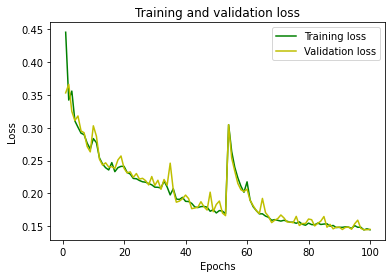

In [113]:
plt.clf()
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

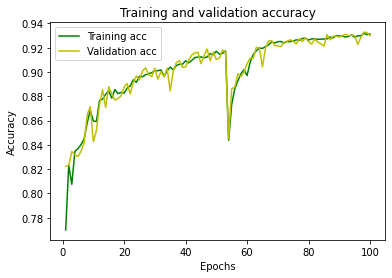

In [114]:
plt.clf()
acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [115]:
# Evaluation du model
model_lstm.evaluate(x_test,y_test)

1454/1454 [==============================] - 9s 6ms/step - loss: 0.1470 - accuracy: 0.9303


[0.14703591167926788, 0.9303441047668457]

In [116]:
# Prediction et affichage des performance du model
y_pred = model_lstm.predict(x_test)
y_pred = np.argmax(y_pred,axis=1) 
y_true = np.argmax(y_test,axis=1)

print("Accuracy: {}" .format(metrics.accuracy_score(y_true, y_pred)))
print("Precision: {}" .format(metrics.precision_score(y_true, y_pred, average='macro')))
print("Recall: {}" .format(metrics.recall_score(y_true, y_pred, average='macro')))
print("F1: {}" .format(metrics.f1_score(y_true, y_pred, average='macro')))


Accuracy: 0.9303440860215054
Precision: 0.9320878476962366
Recall: 0.9303440860215053
F1: 0.9302737380680004


In [ ]:
y_test.shape

(46500, 2)

In [ ]:
y_pred.shape

(186000,)

In [117]:
def plot_confusing_matrix (y_compare,pred,n_categories):

  cm = metrics.confusion_matrix(y_compare, pred)
  plot_confusion_matrix(conf_mat=cm,figsize=(13,13),show_normed=True)
  plt.title('Matrice de confusion')
  plt.ylabel('Cible')
  plt.xlabel('Prédite')
  plt.show()

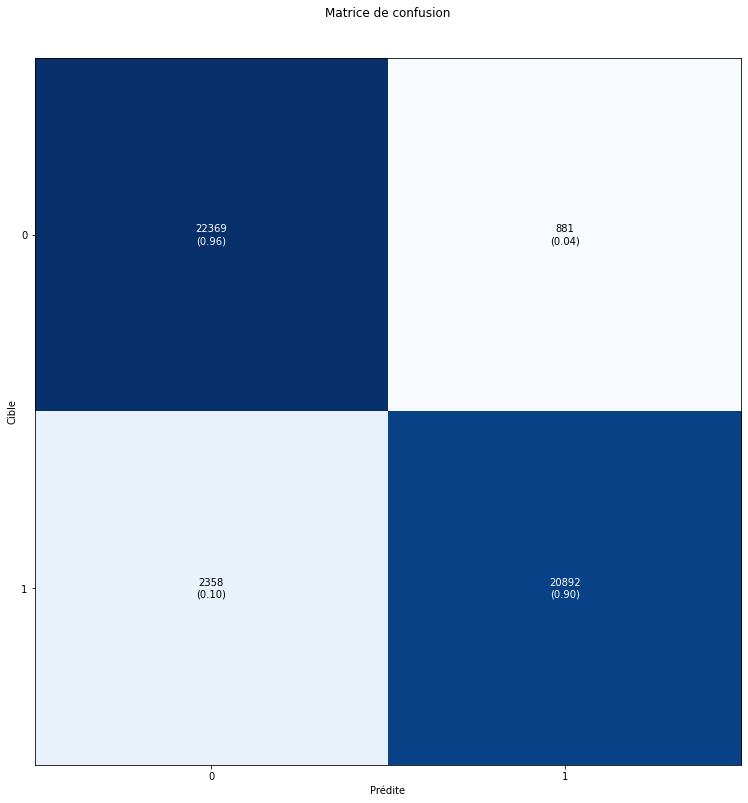

In [118]:
plot_confusing_matrix(y_true,y_pred,2)

Application d'un reseau de neuronnes convolutif


In [119]:

X_train = x_train.reshape(x_train.shape[0], 1, 42, 1)   
X_test= x_test.reshape(x_test.shape[0], 1, 42, 1)

In [120]:
X_test.shape

(46500, 1, 42, 1)

In [121]:
X_train.shape

(139500, 1, 42, 1)

In [122]:
y_train.shape

(139500, 2)

In [123]:
y_test.shape

(46500, 2)

In [131]:
# Model CNN
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D,BatchNormalization
from keras.layers import LSTM,TimeDistributed,Conv1D,MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from keras import models
from keras import layers
from keras.models import Model

CNN_model = Sequential()
CNN_model.add(Conv2D(128, kernel_size=(3, 3),activation='tanh',padding='same',input_shape=(1,42,1)))
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
CNN_model.add(Conv2D(64, (3, 3), activation='tanh',padding='same'))
CNN_model.add(Flatten())
CNN_model.add(Dense(2, activation='sigmoid'))
CNN_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_model.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 1, 42, 128)        1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 21, 128)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 21, 128)        147584    
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 21, 64)         73792     
                                                                 
 flatten_13 (Flatten)        (None, 1344)              0         
                                                                 
 dense_61 (Dense)            (None, 2)                 2690      
                                                     

In [132]:
history = CNN_model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=1,batch_size=512,epochs=100)

Epoch 1/100
273/273 [==============================] - 5s 15ms/step - loss: 0.3039 - accuracy: 0.8462 - val_loss: 0.2467 - val_accuracy: 0.8875
Epoch 2/100
273/273 [==============================] - 4s 13ms/step - loss: 0.2412 - accuracy: 0.8866 - val_loss: 0.2335 - val_accuracy: 0.8829
Epoch 3/100
273/273 [==============================] - 4s 13ms/step - loss: 0.2182 - accuracy: 0.9005 - val_loss: 0.2078 - val_accuracy: 0.9105
Epoch 4/100
273/273 [==============================] - 4s 13ms/step - loss: 0.1991 - accuracy: 0.9111 - val_loss: 0.1910 - val_accuracy: 0.9099
Epoch 5/100
273/273 [==============================] - 4s 13ms/step - loss: 0.1857 - accuracy: 0.9161 - val_loss: 0.1778 - val_accuracy: 0.9202
Epoch 6/100
273/273 [==============================] - 4s 13ms/step - loss: 0.1772 - accuracy: 0.9201 - val_loss: 0.1777 - val_accuracy: 0.9174
Epoch 7/100
273/273 [==============================] - 4s 14ms/step - loss: 0.1726 - accuracy: 0.9218 - val_loss: 0.1824 - val_accuracy:

In [133]:
# Evaluation du model
CNN_model.evaluate(X_test,y_test)

1454/1454 [==============================] - 4s 3ms/step - loss: 0.1424 - accuracy: 0.9358


[0.1424478441476822, 0.9358064532279968]

In [134]:
predict_prob=CNN_model.predict(X_test)
y_pred_cnn=np.argmax(predict_prob,axis=1)


##print (y_pred)
y_true_cnn=np.argmax(y_test, axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_true_cnn, y_pred_cnn)
print (CM)
print(classification_report(y_true, y_pred))

[[22122  1128]
 [ 1857 21393]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     23250
           1       0.96      0.90      0.93     23250

    accuracy                           0.93     46500
   macro avg       0.93      0.93      0.93     46500
weighted avg       0.93      0.93      0.93     46500



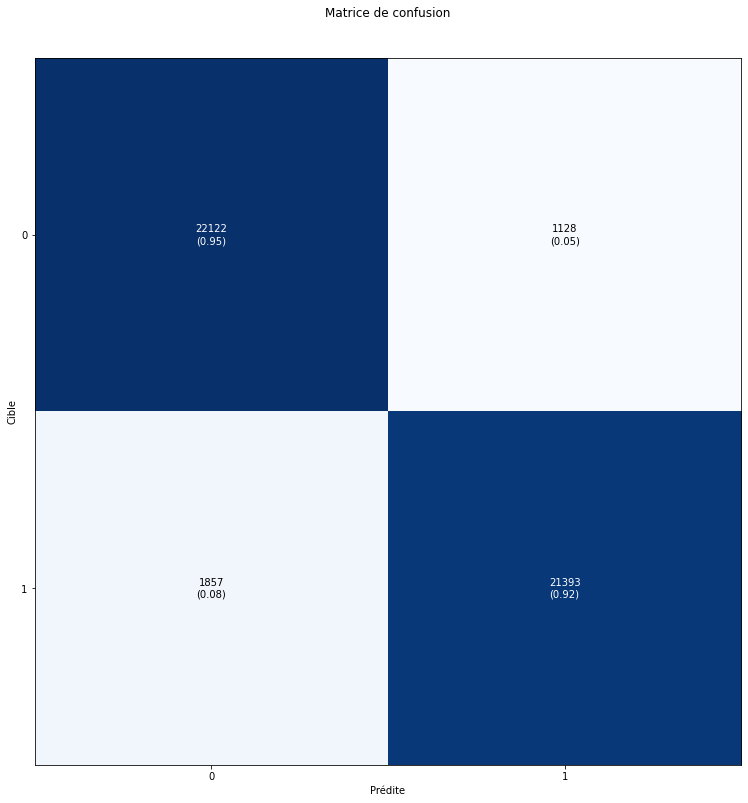

In [136]:
plot_confusing_matrix(y_true_cnn,y_pred_cnn,2)

In [137]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


In [138]:
#Sensibilité, taux de réussite, rappel ou taux de vrais positifs
TPR = TP/(TP+FN)
print ('TPR',TPR)

TPR 0.9201290322580645


In [139]:
# Spécificité ou taux de vrais négatifs
TNR = TN/(TN+FP) 
print('TNR',TNR)

TNR 0.9514838709677419


In [140]:
#Chute ou taux de faux positifs
FPR = FP/(FP+TN)
print('FPR',FPR)

FPR 0.04851612903225806


In [141]:
# Taux de faux négatifs
FNR = FN/(TP+FN)
print ('FNR',FNR) 

FNR 0.07987096774193549
